In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys

import matplotlib.pyplot as plt
import mglearn

if 'google.colab' in sys.modules:
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz

In [3]:
from preamble import *
import matplotlib

# D2Coding 폰트를 사용합니다.
# matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rc('font', family='D2Coding')
matplotlib.rcParams['axes.unicode_minus'] = False

# 코랩에서 넘파이 경고를 나타내지 않기 위해
import sys
if 'google.colab' in sys.modules:
    import warnings
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# 평가 지표와 측정

### 불균형 데이터셋

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [5]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [9]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.80
logreg 점수: 0.98


### 오차행렬(confusion matrix)

In [10]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


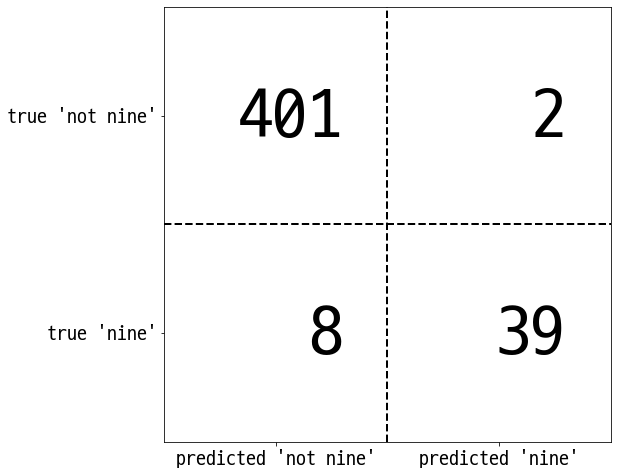

In [11]:
mglearn.plots.plot_confusion_matrix_illustration()

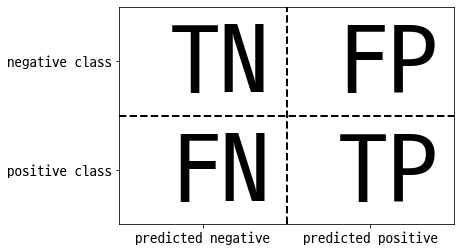

In [12]:
mglearn.plots.plot_binary_confusion_matrix()

In [14]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀:")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[368  35]
 [ 45   2]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[402   1]
 [  6  41]]


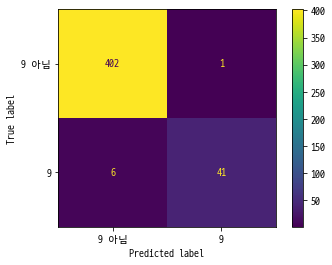

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['9 아님', '9'])
plt.show()

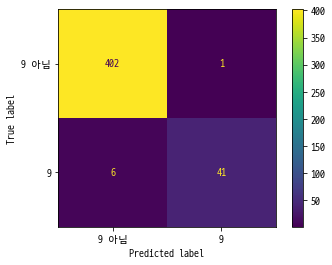

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=['9 아님', '9'])
plt.show()

In [17]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.05
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", "9"], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [20]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.91      0.90       403
           9       0.05      0.04      0.05        47

    accuracy                           0.82       450
   macro avg       0.47      0.48      0.47       450
weighted avg       0.80      0.82      0.81       450



In [21]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### 불확실성 고려

In [22]:
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

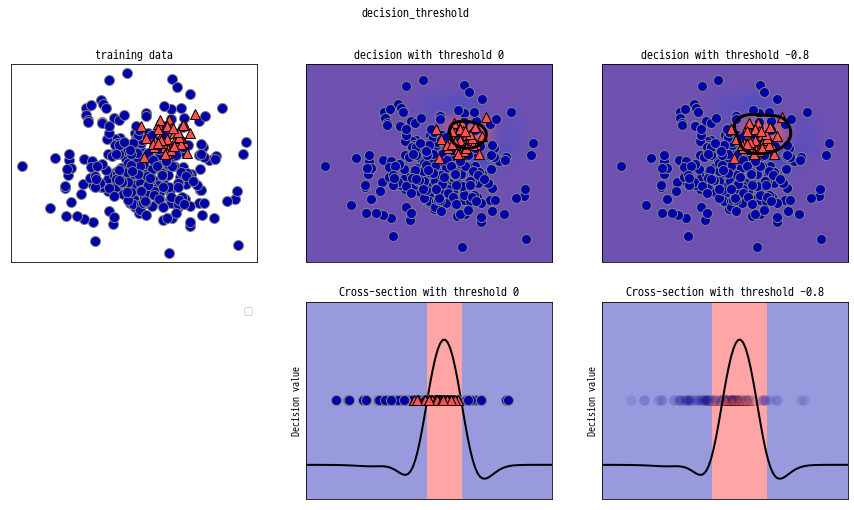

In [23]:
mglearn.plots.plot_decision_threshold()

In [24]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [25]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [26]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



### 정밀도-재현율 곡선과 ROC 곡선

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

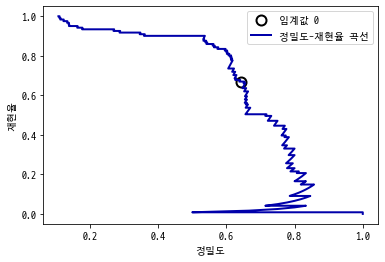

In [29]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다.
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show()

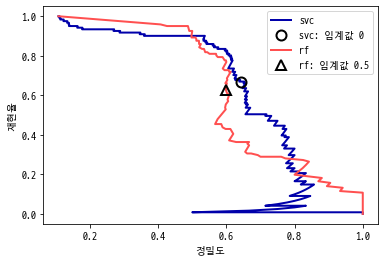

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="svc: 임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")
plt.show()

In [32]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [33]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


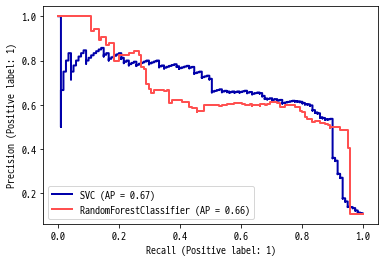

In [34]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

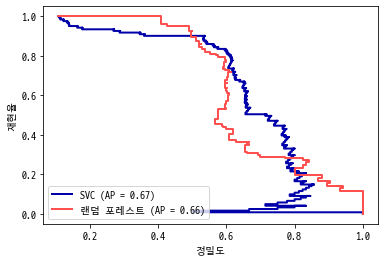

In [35]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall, recall=precision, average_precision=ap_svc, estimator_name='SVC')
disp.plot(ax=ax)
# 랜덤 포레스트 곡선 그리기
disp = PrecisionRecallDisplay(precision=recall_rf, recall=precision_rf, average_precision=ap_rf, estimator_name='랜덤 포레스트')
disp.plot(ax=ax)
ax.set(xlabel='정밀도', ylabel='재현율')
plt.show()

### ROC와 AUC

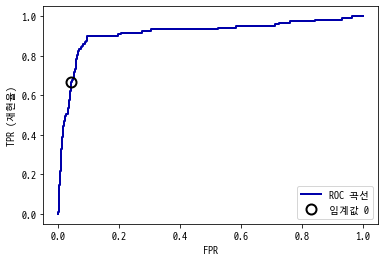

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

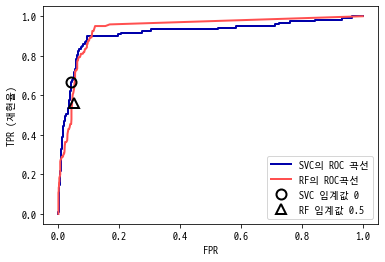

In [38]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="SVC 임계값 0", fillstyle="none", c= "k", mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="RF 임계값 0.5", fillstyle = "none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


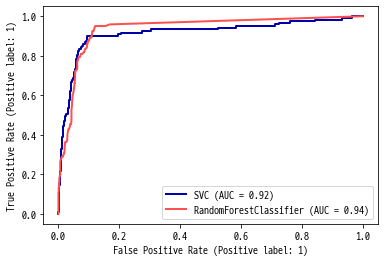

In [40]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax)
plt.show()

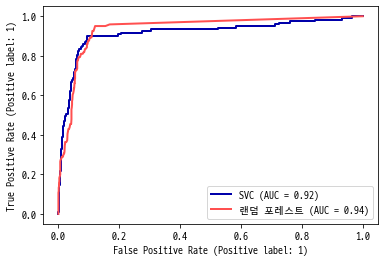

In [41]:
fig, ax = plt.subplots()
# SVC 곡선 그리기
RocCurveDisplay.from_predictions(y_test, svc.decision_function(X_test), name="SVC", ax=ax)
# 랜덤 포레스트 곡선 그리기
RocCurveDisplay.from_predictions(y_test, rf.predict_proba(X_test)[:, 1], name="랜덤 포레스트", ax=ax)
plt.show()

gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


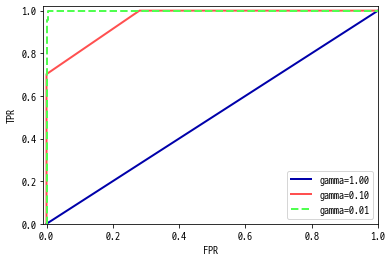

In [46]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()

### 다중 분류의 평가 지표

In [48]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도 : {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도 : 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


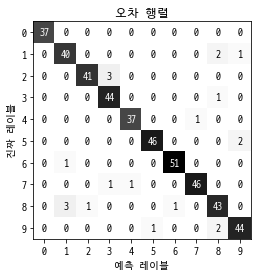

In [50]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='예측 레이블',
                                     ylabel='진짜 레이블', xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()
plt.show()

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [52]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average='micro')))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average='macro')))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 회귀의 평가 지표

In [54]:
from sklearn.model_selection import cross_val_score
# 분류의 기본 평가 지표는 정확도 입니다.
print("기본 평가 지표:", cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과는 같습니다.
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy", cv=5)

ap =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]


In [56]:
from sklearn.model_selection import  cross_validate
res = cross_validate(SVC(), digits.data, digits.target == 9, scoring=["accuracy", "roc_auc", "recall_macro"], return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.02,0.02,0.97,0.99,1.00,1.0,0.89,0.97
1,0.02,0.02,0.99,1.00,1.00,1.0,0.96,0.98
2,0.03,0.02,1.00,1.00,1.00,1.0,1.00,0.98
3,0.03,0.02,0.99,1.00,1.00,1.0,0.97,0.98
4,0.05,0.02,0.98,1.00,0.98,1.0,0.90,0.99


In [57]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9 , random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다.
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다.
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(정확도)): {:3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수(정확도)): 0.971789
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [58]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision", cv=3)
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수(평균 정밀도)): {:3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(grid.score(X_test, y_test)))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수(평균 정밀도)): 0.984805
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.996
